# Data Set Information
***
**The original database contains 76 attributes, 
but ML researchers tend to use a subset only containing 14 attributes. 
The “goal” field refers to the presence of heart disease in the patient (num). 
It is integer valued from 0 (no presence) to 4. With this experiment we will attempt to to distinguish presence (values 
1,2,3,4) from absence (value 0).**
***

**1.age**

**2.sex**

**3.cp:** chest pain type

    — Value 1: typical angina

    — Value 2: atypical angina

    — Value 3: non-anginal pain
   
    — Value 4: asymptomatic

**4.trestbps:** resting blood pressure (in mm Hg on admission to the hospital)

**5.chol:** serum cholestoral in mg/dl

**6.fbs:** fasting blood sugar > 120 mg/dl (1 = true; 0 = false)

**7.restecg:** resting electrocardiographic results

    — Value 0: normal

    — Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)

    — Value 2: showing probable or definite left ventricular hypertrophy by Estes’ criteria

**8.thalach:** maximum heart rate achieved

**9.exang:** exercise induced angina (1 = yes; 0 = no)

**10.oldpeak:** ST depression induced by exercise relative to rest

**11.slope:** the slope of the peak exercise ST segment

    — Value 1: upsloping
    
    — Value 2: flat
    
    — Value 3: downsloping

**12.ca:** number of major vessels (0-3) colored by flourosopy

    thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

**13.num** (predicted attribute): diagnosis of heart disease (angiographic disease status)

    — Value 0: < 50% diameter narrowing
    
    — Value 1: > 50% diameter narrowing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

In [2]:
df=pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


**Before training the logistic regression we need to observe and analyse the data to see what we are going to work with.**

In [3]:
pd.set_option("display.float", "{:.2f}".format)
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00
mean,54.37,0.68,0.97,131.62,246.26,0.15,0.53,149.65,0.33,1.04,1.40,0.73,2.31,0.54
std,9.08,0.47,1.03,17.54,51.83,0.36,0.53,22.91,0.47,1.16,0.62,1.02,0.61,0.50
min,29.00,0.00,0.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,47.50,0.00,0.00,120.00,211.00,0.00,0.00,133.50,0.00,0.00,1.00,0.00,2.00,0.00
50%,55.00,1.00,1.00,130.00,240.00,0.00,1.00,153.00,0.00,0.80,1.00,0.00,2.00,1.00
75%,61.00,1.00,2.00,140.00,274.50,0.00,1.00,166.00,1.00,1.60,2.00,1.00,3.00,1.00
max,77.00,1.00,3.00,200.00,564.00,1.00,2.00,202.00,1.00,6.20,2.00,4.00,3.00,1.00


<AxesSubplot:ylabel='target'>

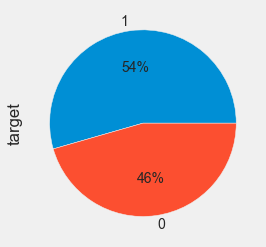

In [4]:
df.target.value_counts().plot(kind='pie',autopct='%1.0f%%')

**54% people have heart decease**

In [5]:
# Checking for missing  values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

#### This dataset looks perfect to use as we don’t have null values.

In [6]:
#Now it's time to deal with the categorical features and continous feature so as per my rule i  check the unique value of the 
#columns then decide what i will do before to check all thing i want to know that which column is categorical or continous
#we can observe that what is continous or not

In [7]:
for column in df.columns:
    print('==============================')
    print(f"{column} : {df[column].unique()}")
   

age : [63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]
sex : [1 0]
cp : [3 2 1 0]
trestbps : [145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]
chol : [233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 330 290 172 305 188 282 185 326 274 164 307
 249 341 407 217 174 281 289 322 299 300 293 184 409 259 200 327 237 218
 319 166 311 169 187 176 241 131]
fbs :

In [8]:
#Now we want to gain the information with the data set so i will draw the pair plot that will helpful to do in to gaining the inforormation

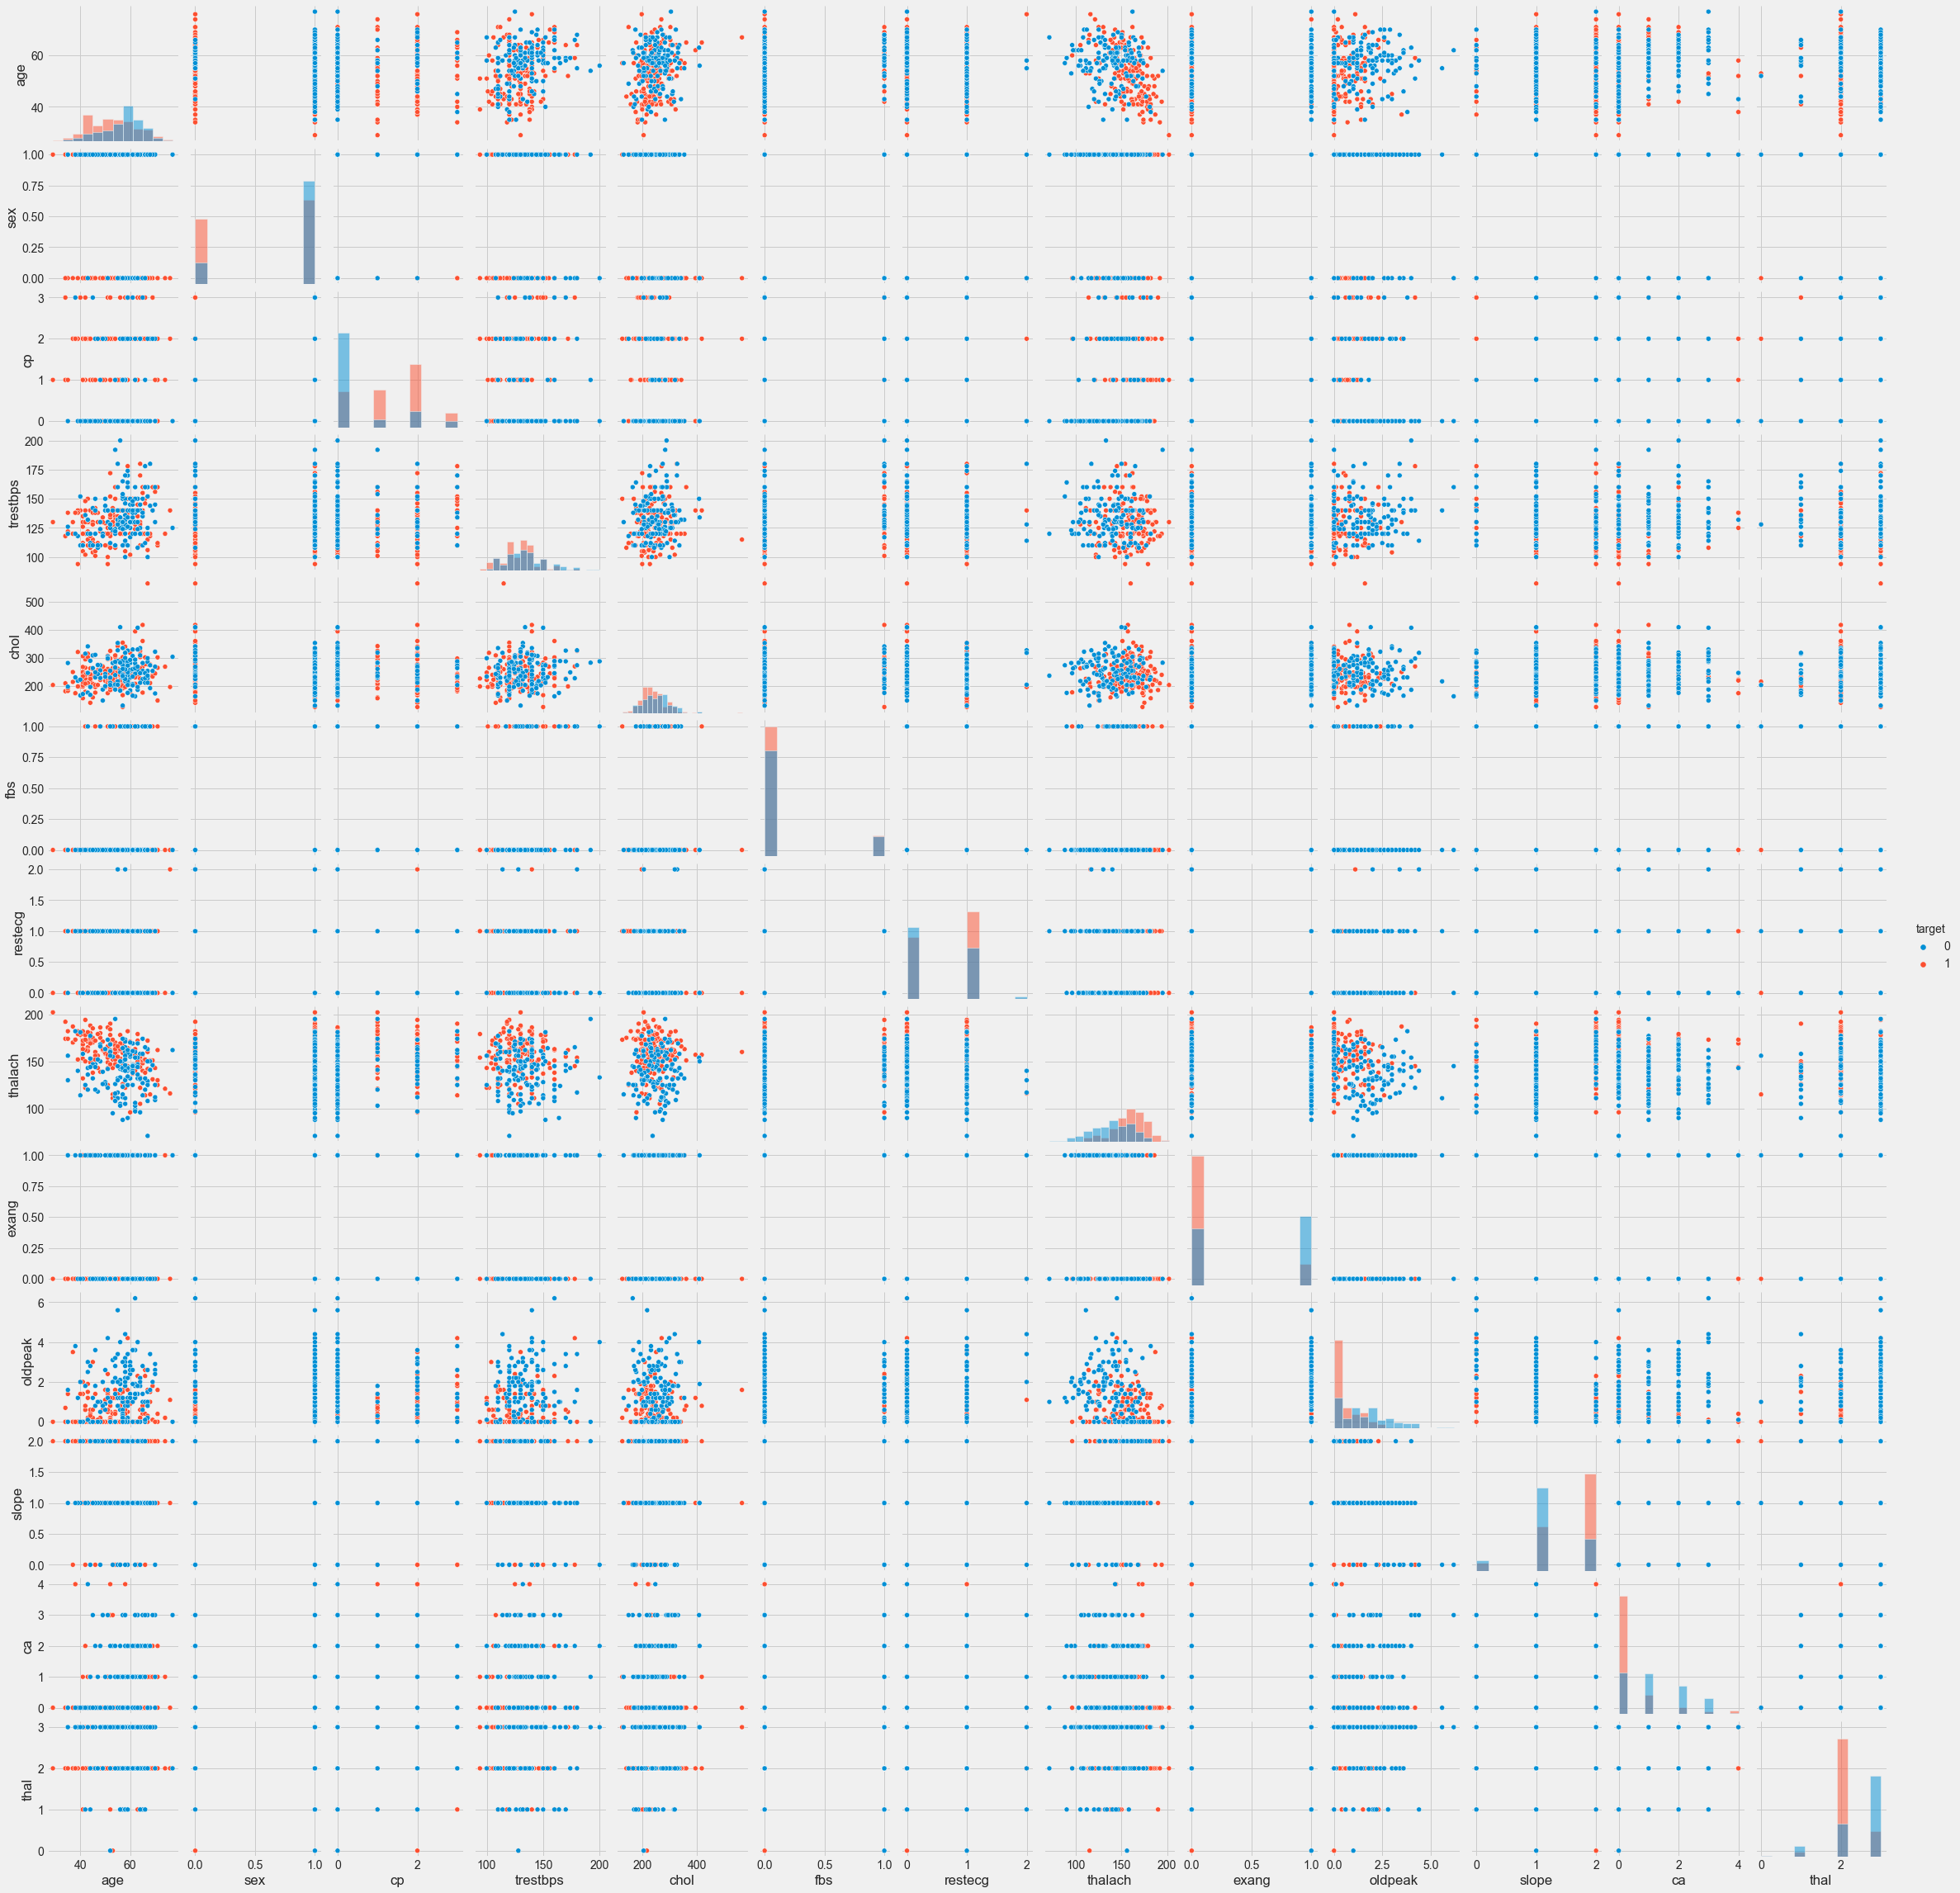

In [9]:
sns.pairplot(df ,hue='target',diag_kind="hist")

In [10]:
#in above chart that is too lengthy to took the valueable  infromation so i will draw the seprate chart which will be
#helpfut to in gainig the information

In [11]:
categorical_val=['sex','cp','fbs','restecg','exang','slope','ca','thal','target']


In [12]:
continous_val=[i for i in df.columns if i  not in categorical_val]

In [13]:
print(categorical_val)
print(continous_val)

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']
['age', 'trestbps', 'chol', 'thalach', 'oldpeak']


In [14]:
# Now we have the information about the categorical columns and continous columns

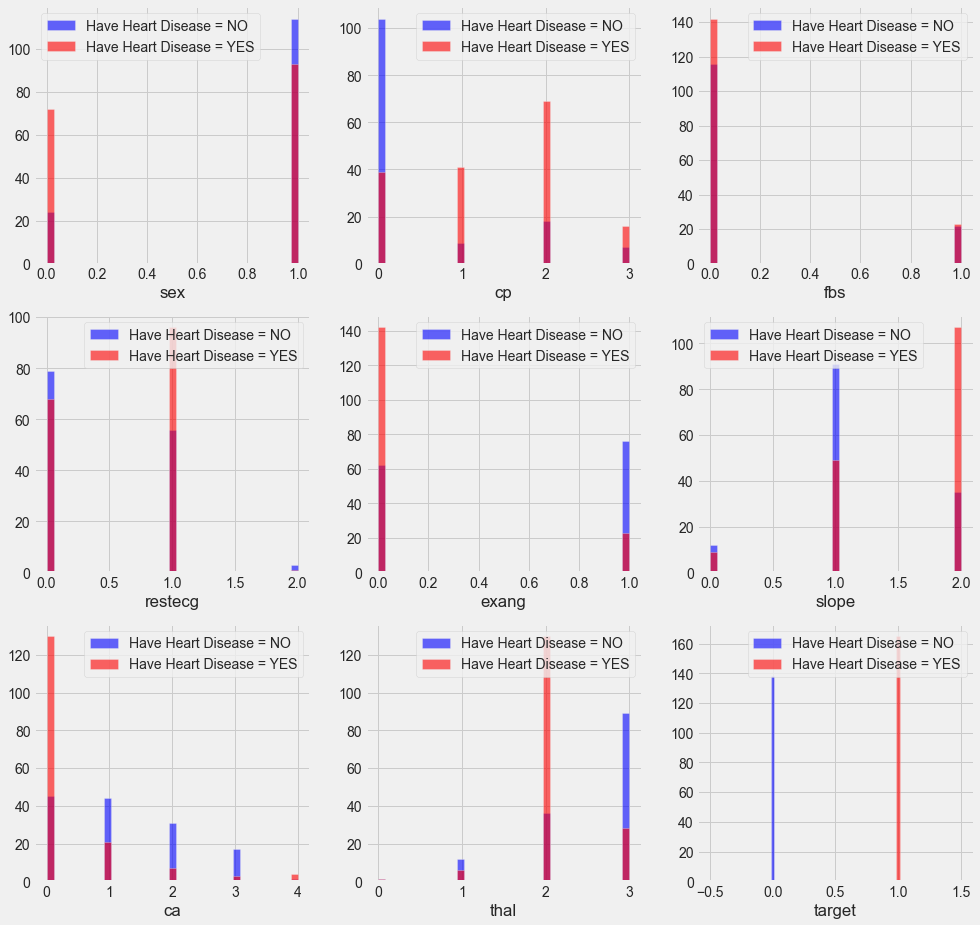

In [15]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(categorical_val, 1):
    plt.subplot(3, 3, i)
    df[df["target"] == 0][column].hist(bins=35, color='blue', label='Have Heart Disease = NO', alpha=0.6)
    df[df["target"] == 1][column].hist(bins=35, color='red', label='Have Heart Disease = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

# Observations from the above plot:
**cp {Chest pain}:**People with cp 1, 2, 3 are more likely to have heart disease than people with cp 0.

**restecg {resting EKG results}:** People with a value of 1 (reporting an abnormal heart rhythm, which can range from mild symptoms to severe problems) are more likely to have heart disease.

**exang {exercise-induced angina}:** people with a value of 0 (No ==> angina induced by exercise) have more heart disease than people with a value of 1 (Yes ==> angina induced by exercise)

**slope {the slope of the ST segment of peak exercise}:** People with a slope value of 2 (Downslopins: signs of an unhealthy heart) are more likely to have heart disease than people with a slope value of 2 slope is 0 (Upsloping: best heart rate with exercise) or 1 (Flatsloping: minimal change (typical healthy heart)).

**ca {number of major vessels (0-3) stained by fluoroscopy}:** the more blood movement the better, so people with ca equal to 0 are more likely to have heart disease.


**thal {thalium stress result}:** People with a thal value of 2 (defect corrected: once was a defect but ok now) are more likely to have heart disease.


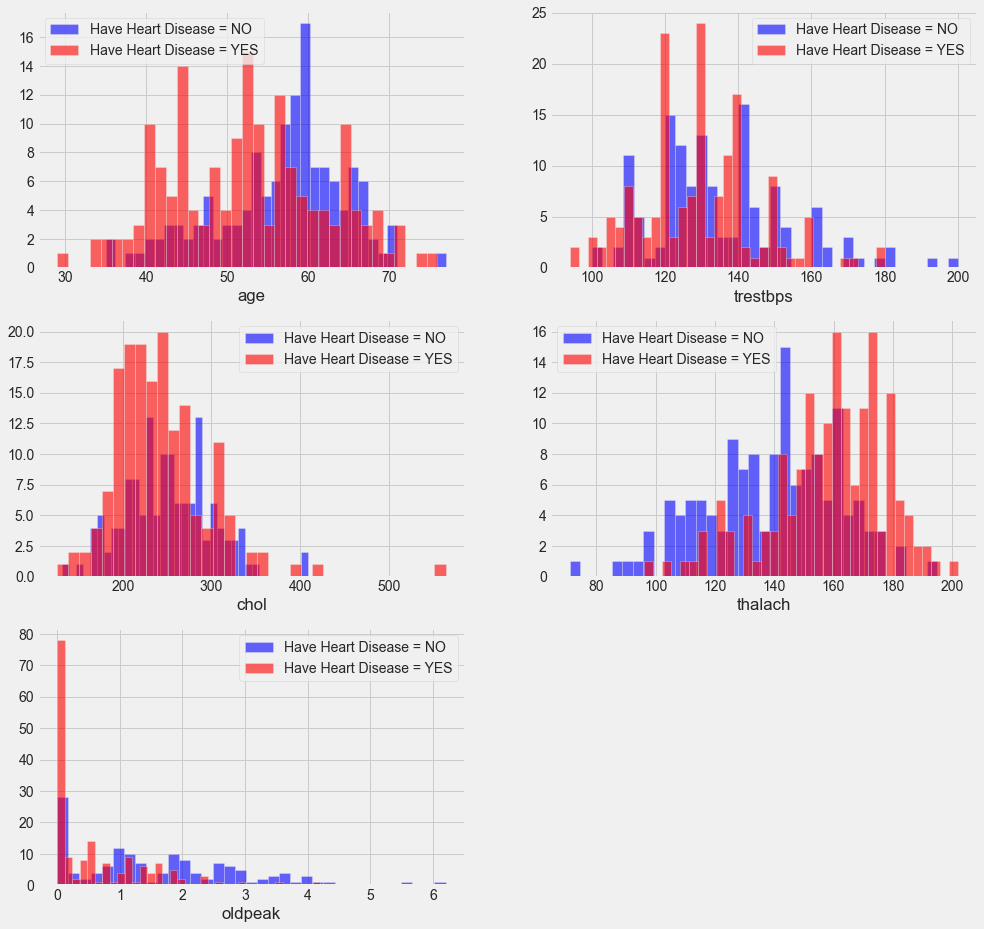

In [16]:

plt.figure(figsize=(15, 15))

for i, column in enumerate(continous_val, 1):
    plt.subplot(3, 2, i)
    df[df["target"] == 0][column].hist(bins=35, color='blue', label='Have Heart Disease = NO', alpha=0.6)
    df[df["target"] == 1][column].hist(bins=35, color='red', label='Have Heart Disease = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

**Observations from the above plot:**

**trestbps:** resting blood pressure anything above 130-140 is generally of concern

**chol:** greater than 200 is of concern.

**thalach:** People with a maximum of over 140 are more likely to have heart disease.
the old peak of exercise-induced ST depression vs. rest looks at heart stress during exercise an unhealthy heart will stress more.

(14.5, -0.5)

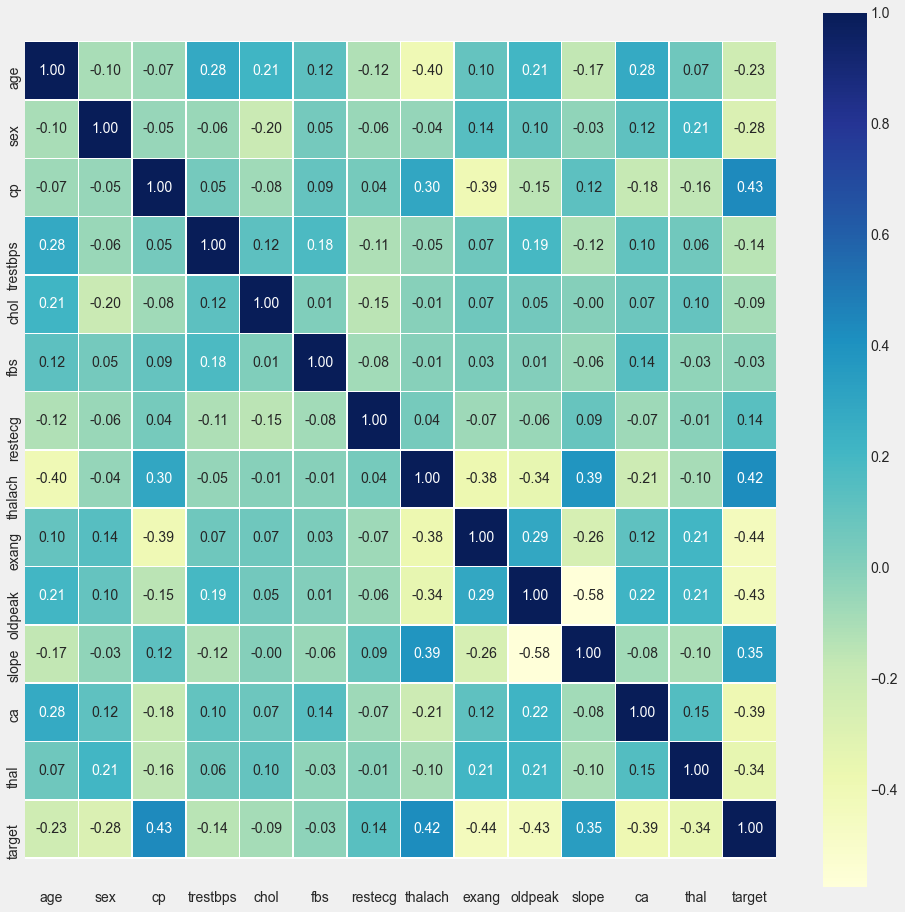

In [17]:
# Let's make our correlation matrix a little prettier
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

<AxesSubplot:title={'center':'Correlation with target'}>

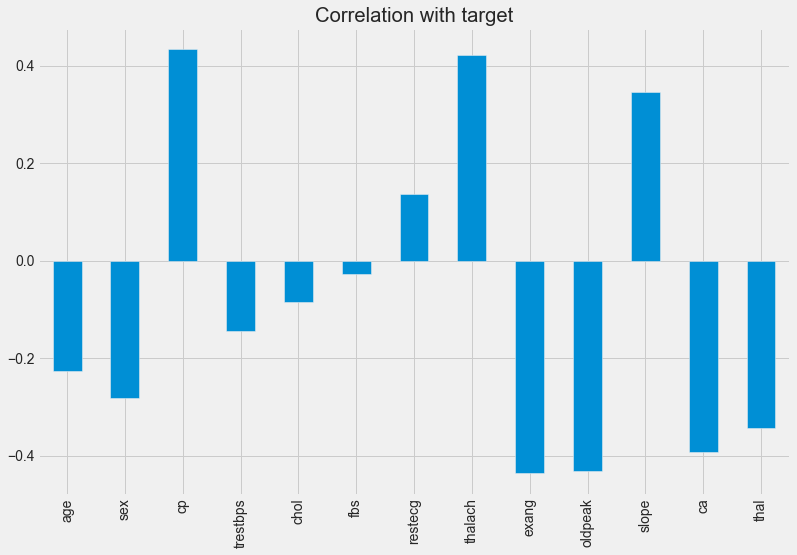

In [18]:
df.drop('target', axis=1).corrwith(df.target).plot(kind='bar', grid=True, figsize=(12, 8), 
                                                   title="Correlation with target")

##### 1.fbs and chol are the least correlated with the target variable

##### 2.All other variables have a significant correlation with the target variable.

***
# Data Processing

After exploring the dataset, we can observe that we need to convert some categorical variables 

to dummy variables and scale all values before training the machine learning models.

So, for this task, I’ll use the get_dummies method to create dummy columns for categorical variables:
***

In [19]:
categorical_val.remove('target')
dataset = pd.get_dummies(df, columns = categorical_val)

from sklearn.preprocessing import StandardScaler

s_sc = StandardScaler()
col_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[col_to_scale] = s_sc.fit_transform(dataset[col_to_scale])

#### Now let’s split the data into training and test sets. I will split the data into 70% training and 30% testing:

In [20]:

from sklearn.model_selection import train_test_split

X = dataset.drop('target', axis=1)
y = dataset.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

##### Now let’s train  the machine learning model 

In [21]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train, y_train)


LogisticRegression(solver='liblinear')

##### Now Let's  print the classification report of our logistic regression model

In [22]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [23]:
print_score(lr_clf, X_train, y_train, X_test, y_test, train=True)
print_score(lr_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 86.79%
_______________________________________________
CLASSIFICATION REPORT:
              0      1  accuracy  macro avg  weighted avg
precision  0.88   0.86      0.87       0.87          0.87
recall     0.82   0.90      0.87       0.86          0.87
f1-score   0.85   0.88      0.87       0.87          0.87
support   97.00 115.00      0.87     212.00        212.00
_______________________________________________
Confusion Matrix: 
 [[ 80  17]
 [ 11 104]]

Test Result:
Accuracy Score: 86.81%
_______________________________________________
CLASSIFICATION REPORT:
              0     1  accuracy  macro avg  weighted avg
precision  0.87  0.87      0.87       0.87          0.87
recall     0.83  0.90      0.87       0.86          0.87
f1-score   0.85  0.88      0.87       0.87          0.87
support   41.00 50.00      0.87      91.00         91.00
_______________________________________________
Confusion Matrix: 
 [[34  7]
 [ 5 45]]



In [24]:
test_score = accuracy_score(y_test, lr_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, lr_clf.predict(X_train)) * 100

results_df = pd.DataFrame(data=[["Logistic Regression", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,86.79,86.81


**As you can see the model performs very well of the test set as it is giving almost the same accuracy in the test 
set as in the training set.**

#### Now  i will try hyperparameter tunnig to increase the accuracy 

In [33]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
penalty='l1', 'l2', 'elasticnet', 'none',
dual=True,False,
tol=100, 10, 1.0, 0.1, 0.01,
C=100, 10, 1.0, 0.1, 0.01,
fit_intercept=True, False,
intercept_scaling=1,
random_state=1,2,3,4,
solver='newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga',
max_iter=100,
multi_class='auto', 'ovr', 'multinomial',
verbose=1,2,3,4,10,
warm_start=1,2,3,5,
n_jobs=1,2,3,5,
random_grid = {'penalty':penalty,
                   'dual': dual,
                   'tol': tol,
                   'C':C,
                   'fit_intercept':fit_intercept,
                    'intercept_scaling': intercept_scaling,
                   'random_state':random_state,
                   'solver':solver,
                   'max_iter':max_iter,
                   'multi_class':multi_class,
                   'multi_class':multi_class,
                   'multi_class':multi_class,
                   'verbose':verbose,
                   'warm_start':warm_start,
                   'n_jobs':n_jobs,}
print(random_grid)

{'penalty': ('l1', 'l2', 'elasticnet', 'none'), 'dual': (True, False), 'tol': (100, 10, 1.0, 0.1, 0.01), 'C': (100, 10, 1.0, 0.1, 0.01), 'fit_intercept': (True, False), 'intercept_scaling': (1,), 'random_state': (1, 2, 3, 4), 'solver': ('newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'), 'max_iter': (100,), 'multi_class': ('auto', 'ovr', 'multinomial'), 'verbose': (1, 2, 3, 4, 10), 'warm_start': (1, 2, 3, 5), 'n_jobs': (1, 2, 3, 5)}


In [34]:
 %%time
lr=LogisticRegression()
lr_randomcv=RandomizedSearchCV(estimator=lr,param_distributions=random_grid,verbose=2,
                               cv=3,n_jobs=-1)

Wall time: 0 ns


In [35]:
%%time
lr_randomcv.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
convergence after 17 epochs took 0 seconds
Wall time: 312 ms


C:\Users\Amit kumar\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.81602951        nan        nan        nan        nan        nan
        nan        nan        nan        nan]
  warnings.warn(
C:\Users\Amit kumar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.0s finished


RandomizedSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
                   param_distributions={'C': (100, 10, 1.0, 0.1, 0.01),
                                        'dual': (True, False),
                                        'fit_intercept': (True, False),
                                        'intercept_scaling': (1,),
                                        'max_iter': (100,),
                                        'multi_class': ('auto', 'ovr',
                                                        'multinomial'),
                                        'n_jobs': (1, 2, 3, 5),
                                        'penalty': ('l1', 'l2', 'elasticnet',
                                                    'none'),
                                        'random_state': (1, 2, 3, 4),
                                        'solver': ('newton-cg', 'lbfgs',
                                                   'liblinear', 'sag', 'saga'),
                             

In [36]:
 lr_randomcv.best_params_

{'warm_start': 1,
 'verbose': 2,
 'tol': 0.01,
 'solver': 'sag',
 'random_state': 2,
 'penalty': 'none',
 'n_jobs': 2,
 'multi_class': 'multinomial',
 'max_iter': 100,
 'intercept_scaling': 1,
 'fit_intercept': False,
 'dual': False,
 'C': 0.1}

In [37]:
lr_new=lr_randomcv.best_estimator_

In [38]:
lr_new.predict(X_test)

array([0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1], dtype=int64)

In [39]:
print_score(lr_new, X_train, y_train, X_test, y_test, train=True)
print_score(lr_new, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 88.21%
_______________________________________________
CLASSIFICATION REPORT:
              0      1  accuracy  macro avg  weighted avg
precision  0.89   0.88      0.88       0.88          0.88
recall     0.85   0.91      0.88       0.88          0.88
f1-score   0.87   0.89      0.88       0.88          0.88
support   97.00 115.00      0.88     212.00        212.00
_______________________________________________
Confusion Matrix: 
 [[ 82  15]
 [ 10 105]]

Test Result:
Accuracy Score: 84.62%
_______________________________________________
CLASSIFICATION REPORT:
              0     1  accuracy  macro avg  weighted avg
precision  0.83  0.86      0.85       0.84          0.85
recall     0.83  0.86      0.85       0.84          0.85
f1-score   0.83  0.86      0.85       0.84          0.85
support   41.00 50.00      0.85      91.00         91.00
_______________________________________________
Confusion Matrix: 
 [[34  7]
 [ 7 43]]



In [40]:
test_score = accuracy_score(y_test, lr_new.predict(X_test)) * 100
train_score = accuracy_score(y_train, lr_new.predict(X_train)) * 100

results_df = pd.DataFrame(data=[["Logistic Regression", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,88.21,84.62


**Now training accuracy has increased and test Accuracy gone down.
it looking little bit overfitting so we can use model without hypertunnig**

Now we can save the model with the help of joblib

In [41]:
from joblib import dump, load

In [42]:
dump(lr_clf, 'lr_clf.joblib') 

['lr_clf.joblib']